#### **DATA 620 - Homework 5**

Author: Kory Martin  
Date: 3/14/2024

Assignment Instructions:
1. Choose a corpus of interest. 
2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way). 
3. Taking the most common words, how many unique words represent half of the total words in the corpus? 
4. Identify the 200 highest frequency words in this corpus. 
5. Create a graph that shows the relative frequency of these 200 words. 
6. Does the observed relative frequency of these words follow Zipf’s law?  Explain. 
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” 

#### **Setup**

In [166]:
import pandas as pd
import nltk
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
import numpy as np

##### **1. Choose a corpus of interest**

For this assignment, the corpus I select is a corpus of training data that I'm using for my DATA 698 Capstone Project. The corpus is a number of blurbs pertaining to Measure HLA which is a local measure focused in Los Angeles. According to the [USC School of Public Policy website](https://priceschool.usc.edu/news/measure-hla-promises-to-change-the-way-angelenos-get-around/), "Measure HLA requires that when the city does work on a street – repair, maintenance, or improvements –  they have to implement the [Mobility Plan 2035](https://planning.lacity.gov/odocument/523f2a95-9d72-41d7-aba5-1972f84c1d36/Mobility_Plan_2035.pdf) adopted in 2015. In brief, HLA requires that the city implement its existing plan, which envisions a network of bus lanes, bicycle lanes, and wider sidewalks. The goal is not to replace the car, but to build streets that allow both car travel and other safe and convenient non-car options."

We begin by importing the text from this file into a dataframe

In [3]:
training_data = pd.read_csv('training_data.csv')

In [5]:
training_data.head()

,Content,Source Name,Source URL
0,Yes. An analysis of crashes in LA in 2022 show...,Yes on HLA,https://yesonhla.com/
1,Measure HLA will mandate safety improvements o...,Yes on HLA,https://yesonhla.com/
2,The Mobility Plan was designed to make streets...,Yes on HLA,https://yesonhla.com/
3,The Mobility Plan's original environmental doc...,Yes on HLA,https://yesonhla.com/
4,"No. Currently, the City of Los Angeles has $70...",Yes on HLA,https://yesonhla.com/


##### **2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).**

We will look to tokenize the words that are within each of the different mini text groupings and consider each word to be a unique words. However, we will also pre-process the texts to exclude any special punctuation and we will change all words to lower case in order to ensure that we are not double counting words that are the same (in terms of their definition and interpretation) but would be considered different simply because of the casing

In [10]:
word_list = []
for i in range(len(training_data)):
    content = training_data.loc[i,'Content']
    tokens = content.split(" ")
    word_list = word_list + tokens

In [217]:
clean_words = [re.sub(r'[\W]', '', word.lower()) for word in word_list]

In [218]:
len(clean_words)

1682

In [219]:
tokens = set(clean_words)

In [220]:
len(tokens)

641

We find that overall there are 1682 words in our corpus, of which only 641 are unique.

##### **3. Taking the most common words, how many unique words represent half of the total words in the corpus?**

To examine the most common words, I used the FreqDist module in nltk to get a frequency count of the various words in the corpus

In [161]:
fdist1 = nltk.FreqDist(clean_words)

Next, I create a list of the individual items in our frequency distribution dictionary

In [162]:
word_dist = [item for item in fdist1.items()]

    

Next, I convert the word_dist list into a Pandas DataFrame

In [163]:
word_dist_df = pd.DataFrame(word_dist)

Next I rename the columns to reflect their interpretative meaning

In [164]:
word_dist_df.columns = ['token','frequency']

The following steps were done to achieve the following:
1. Sort the list of tokens based on the number of occurrences in the overall corpus
2. Next calculate the cumulative frequency of the words
3. Finally, use this cumulative frequency to determine the relative cumulative frequency for the words in the list - in terms of their percentage of the total

In [171]:
word_dist_df_sorted = word_dist_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
word_dist_df_sorted['cum_freq'] = np.cumsum(word_dist_df_sorted['frequency'])
word_dist_df_sorted['cum_pct'] = word_dist_df_sorted.apply(lambda x: round(x['cum_freq']/len(word_list),3),axis=1)

In [175]:
len(word_dist_df_sorted.query('cum_pct <= .50'))

64

In [200]:
print('{:.02f}%'.format(round(len(word_dist_df_sorted.query('cum_pct <= .50'))/len(tokens),4)*100))

9.98%


We see that 64 of the 641 unique words in our corpus - or 9.98% - represents 50% of the total number of words in the corpus

#### **4. Identify the 200 highest frequency words in this corpus.**

Next we will use our sorted dataframe to identify the top 200 words in the corpus

In [203]:
word_dist_df_sorted['pct_freq'] = word_dist_df_sorted.apply(lambda x: x['frequency']/len(word_list),axis=1)

In [211]:
pd.set_option('display.max_rows',200)

In [221]:
word_dist_df_sorted.iloc[:200,:]

,token,frequency,cum_freq,cum_pct,pct_freq
0,the,92,92,0.055,0.054697
1,of,54,146,0.087,0.032105
2,to,44,190,0.113,0.026159
3,and,36,226,0.134,0.021403
4,plan,28,254,0.151,0.016647
5,streets,28,282,0.168,0.016647
6,in,27,309,0.184,0.016052
7,city,23,332,0.197,0.013674
8,mobility,22,354,0.210,0.013080
9,will,22,376,0.224,0.013080


In [227]:
top_words = word_dist_df_sorted.iloc[:200,:].copy()

I generated the following word cloud to display the top words in our word list. One thing that I noticed is that it appears that this particular word cloud generator actually did some pre-processing and removing the more common words from the list.

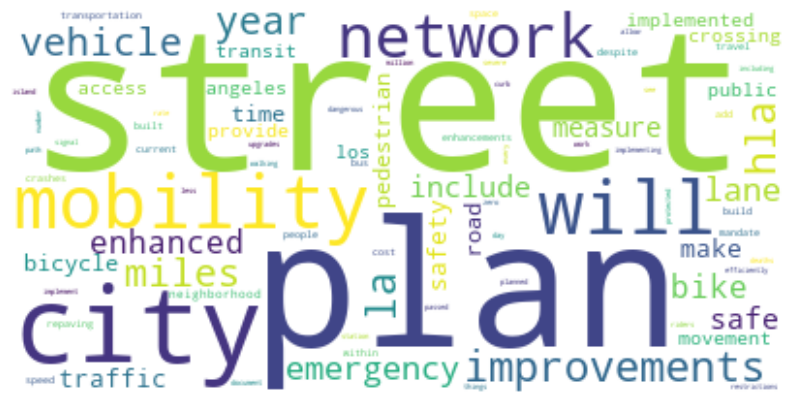

In [224]:
text = " ".join(clean_words)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### **5. Create a graph that shows the relative frequency of these 200 words.**

Next I created a bar plot to display the relative frequency of these 200 words

In [228]:

top_words['token2'] = pd.Categorical(top_words.token, categories=pd.unique(top_words.token))

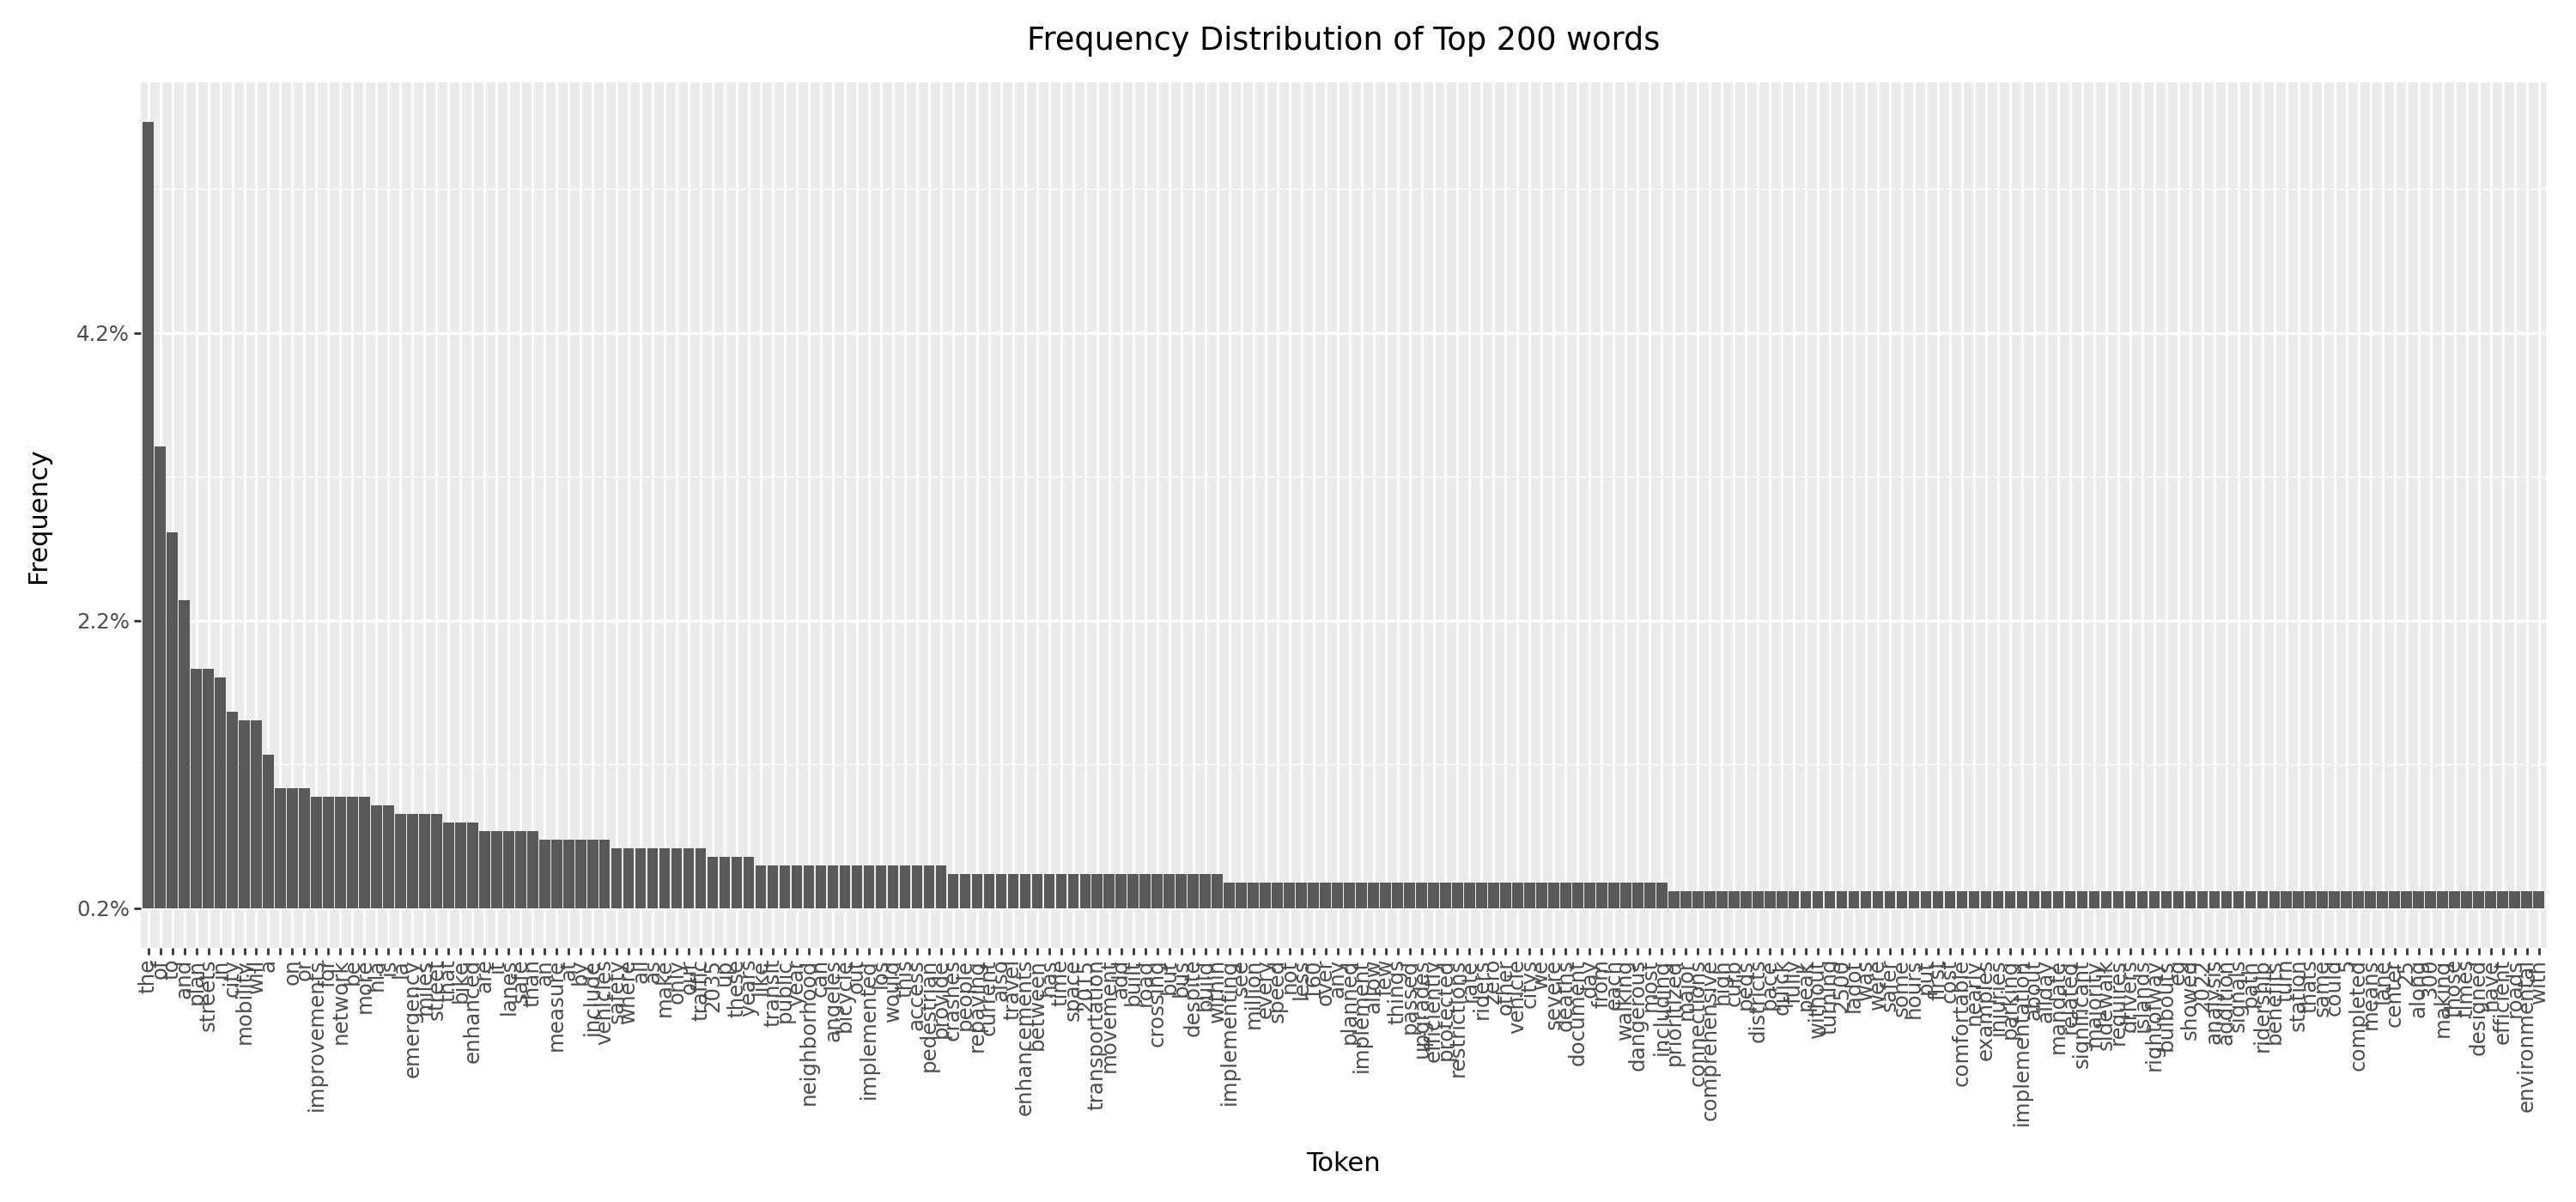

In [230]:
(
    ggplot(top_words.iloc[:200,:])
    + aes(x='token2',y='pct_freq')
    + geom_bar(stat='identity')
    + theme(axis_text_x=element_text(rotation=90),figure_size=(15,7))
    + labs(title="Frequency Distribution of Top 200 words",x='Token', y='Frequency')
    + scale_y_continuous(labels = lambda x: ["%d.2%%" % (pct_freq * 100) for pct_freq in x])
)

#### **6. Does the observed relative frequency of these words follow Zipf’s law?  Explain.**

According to a definition found on [TechTarget.com](https://www.techtarget.com/whatis/definition/Zipfs-Law), Zipf's Law is described as:

<blockquote>
Zipf’s Law is a statistical distribution in certain data sets, such as words in a linguistic corpus, in which the frequencies of certain words are inversely proportional to their ranks. Named for linguist George Kingsley Zipf, who around 1935 was the first to draw attention to this phenomenon, the law examines the frequency of words in natural language and how the most common word occurs twice as often as the second most frequent word, three times as often as the subsequent word and so on until the least frequent word. The word in the position n appears 1/n times as often as the most frequent one.
</blockquote>

When looking at the chart above, we see that there is strong evidence to suggest that our corpus follows this rule. The most frequent words in our corpus are the common words in the English language, such as "the", "of", "and". However, those words are not meaningful to understand the content of our corpus, and thus would be considered as ranking very low in terms of their importance within our corpus. 

#### **7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”**